<a href="https://colab.research.google.com/github/rajkumar0598/Netflix-Movies-Analysis-/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv('/content/new_insurance_data (1).csv')
df


,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [6]:
df.isnull().sum()

,0
age,9
sex,0
bmi,3
children,5
smoker,0
Claim_Amount,14
past_consultations,6
num_of_steps,3
Hospital_expenditure,4
NUmber_of_past_hospitalizations,2


In [7]:
for col in df.columns:
  if df[col].dtype=='object':
    df[col]=df[col].fillna(df[col].mode()[0])
  else:
    df[col]=df[col].fillna(df[col].mean())

In [8]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
Claim_Amount,0
past_consultations,0
num_of_steps,0
Hospital_expenditure,0
NUmber_of_past_hospitalizations,0


In [9]:
df.duplicated().sum()

np.int64(0)

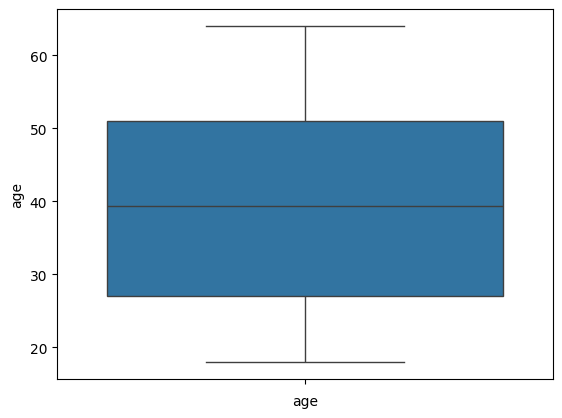

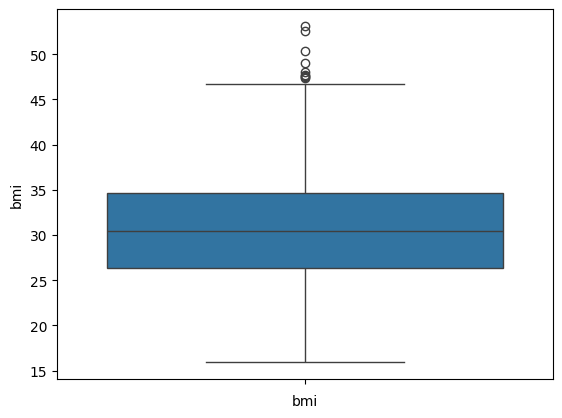

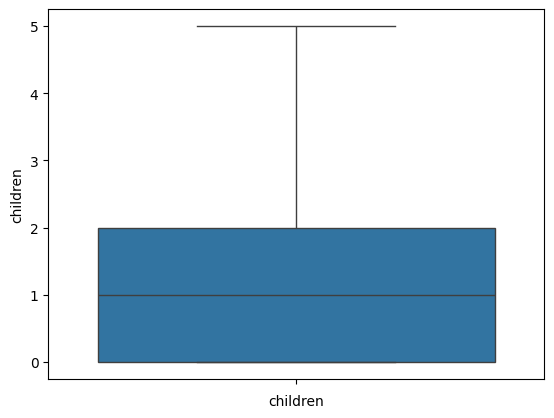

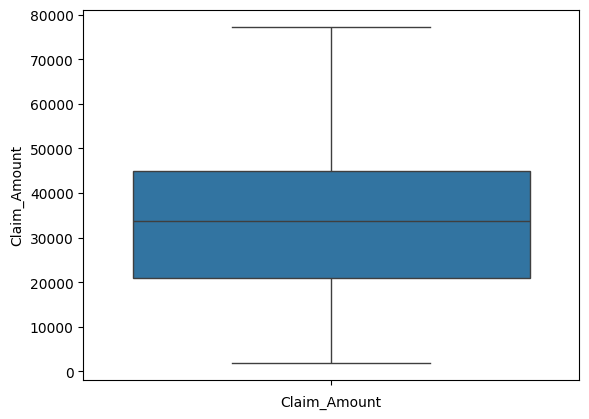

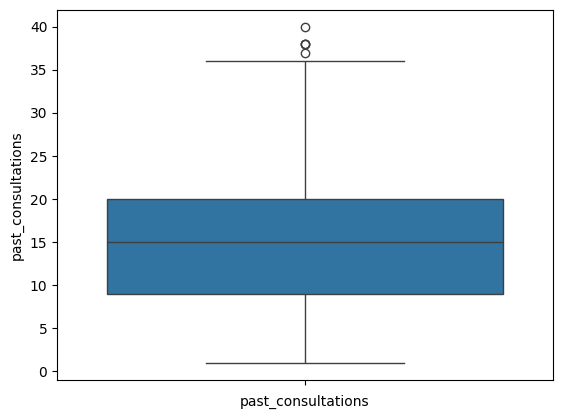

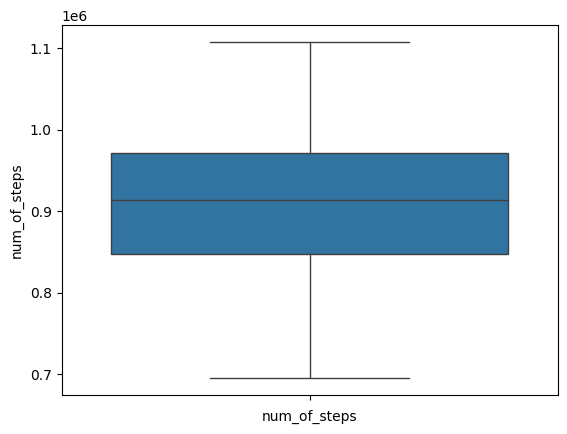

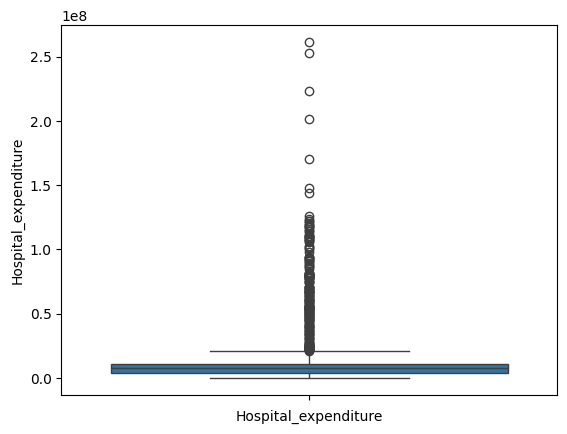

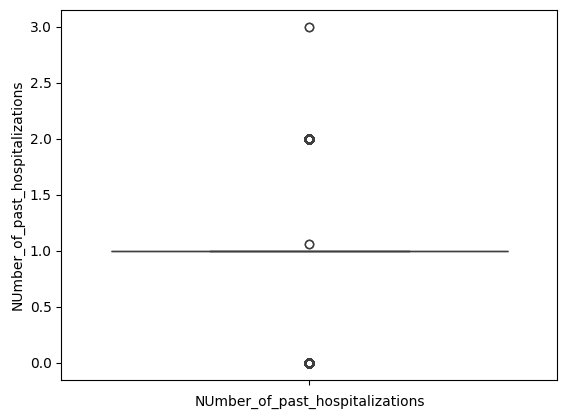

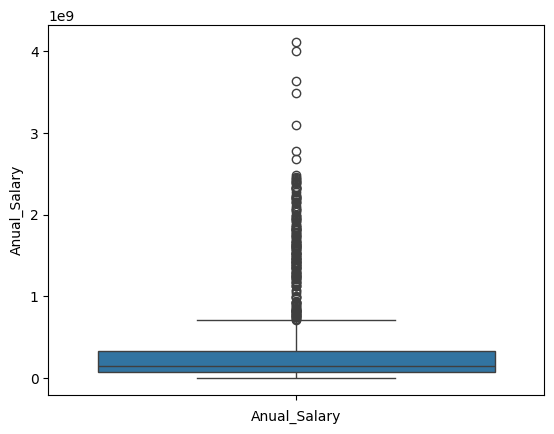

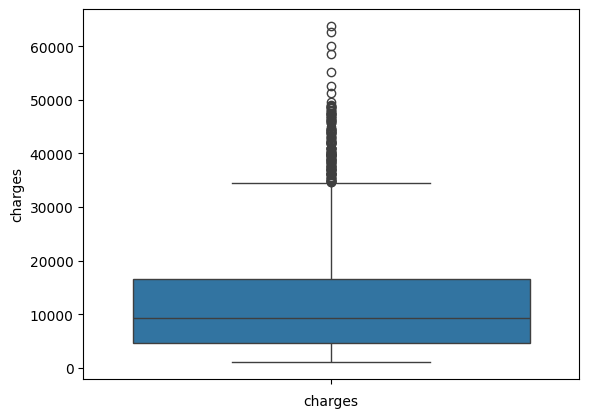

In [10]:
#3 outliers

for col in df.columns:
  if df[col].dtype != 'object':
    sns.boxplot(df[col])
    plt.xlabel(col)
    plt.show()

In [16]:
out_list=['bmi','past_consultations','Hospital_expenditure','Anual_Salary']

for col in out_list:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)

    IQR=Q3-Q1

    LB=Q1-1.5*IQR
    UB=Q3+1.5*IQR

    df=df[(df[col]>=LB) & (df[col]<=UB)]

In [12]:
df.shape

(1338, 13)

In [18]:
out_list=['bmi','past_consultations','Hospital_expenditure','Anual_Salary']
for col in out_list:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)

    IQR=Q3-Q1

    LB=Q1-1.5*IQR
    UB=Q3+1.5*IQR

    df=df[(df[col]>=LB) & (df[col]<=UB)]

In [19]:
df.shape

(995, 13)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 995 entries, 0 to 1024
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              995 non-null    float64
 1   sex                              995 non-null    object 
 2   bmi                              995 non-null    float64
 3   children                         995 non-null    float64
 4   smoker                           995 non-null    object 
 5   Claim_Amount                     995 non-null    float64
 6   past_consultations               995 non-null    float64
 7   num_of_steps                     995 non-null    float64
 8   Hospital_expenditure             995 non-null    float64
 9   NUmber_of_past_hospitalizations  995 non-null    float64
 10  Anual_Salary                     995 non-null    float64
 11  region                           995 non-null    object 
 12  charges                   

In [22]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for col in df.columns:
  if df[col].dtype=='object':
    df[col]=LE.fit_transform(df[col])

In [23]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [24]:
LE=LabelEncoder()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 995 entries, 0 to 1024
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              995 non-null    float64
 1   sex                              995 non-null    int64  
 2   bmi                              995 non-null    float64
 3   children                         995 non-null    float64
 4   smoker                           995 non-null    int64  
 5   Claim_Amount                     995 non-null    float64
 6   past_consultations               995 non-null    float64
 7   num_of_steps                     995 non-null    float64
 8   Hospital_expenditure             995 non-null    float64
 9   NUmber_of_past_hospitalizations  995 non-null    float64
 10  Anual_Salary                     995 non-null    float64
 11  region                           995 non-null    int64  
 12  charges                   

In [27]:
df['sex'].value_counts()

,count
sex,
0,514
1,481


In [29]:
x=df.drop('charges',axis=1)
y=df['charges']

In [30]:
x

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
0,18.0,1,23.21,0.0,0,29087.54313,17.0,715428.0,4720920.992,0.0,5.578497e+07,2
1,18.0,1,30.14,0.0,0,39053.67437,7.0,699157.0,4329831.676,0.0,1.370089e+07,2
2,18.0,1,33.33,0.0,0,39023.62759,19.0,702341.0,6884860.774,0.0,7.352311e+07,2
3,18.0,1,33.66,0.0,0,28185.39332,11.0,700250.0,4274773.550,0.0,7.581968e+07,2
4,18.0,1,34.10,0.0,0,14697.85941,16.0,711584.0,3787293.921,0.0,2.301232e+07,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1013,19.0,1,29.07,0.0,1,58901.21861,16.0,975702.0,8830423.241,1.0,3.304683e+08,1
1014,30.0,1,22.99,2.0,1,42204.03781,23.0,970426.0,5963405.165,1.0,3.045704e+08,1
1015,19.0,0,28.31,0.0,1,50081.81030,17.0,962557.0,5636755.433,1.0,3.341483e+08,1
1019,28.0,1,23.98,3.0,1,41686.19886,12.0,974518.0,8679934.418,1.0,3.225795e+08,2


In [31]:
y

,charges
0,1121.8739
1,1131.5066
2,1135.9407
3,1136.3994
4,1137.0110
...,...
1013,17352.6803
1014,17361.7661
1015,17468.9839
1019,17663.1442


In [ ]:
# steps
# 1. split the data in terms of x and y
# 2. split the data in terms of training and testing
# 3. initialize the model
# 4. train the model using fit
# 5. testing phase
# 6. Accuracy

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [33]:
x_train.shape

(696, 12)

In [35]:
x_test.shape

(299, 12)

In [36]:
x_train

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
864,55.0,0,33.535,2.0,0,35490.67488,19.0,936721.0,5.354665e+06,1.0,2.408795e+08,1
863,55.0,0,32.775,2.0,0,45491.31676,19.0,943939.0,3.626878e+06,1.0,1.513274e+08,1
399,36.0,0,25.900,1.0,0,18242.64590,14.0,868549.0,5.729113e+05,1.0,1.056821e+08,3
822,58.0,1,28.595,0.0,0,29090.53581,9.0,939139.0,9.484864e+06,1.0,1.523098e+08,1
687,50.0,1,32.300,2.0,0,21549.25960,6.0,921026.0,9.298228e+06,1.0,1.907673e+08,3
...,...,...,...,...,...,...,...,...,...,...,...,...
516,42.0,1,37.180,2.0,0,51466.02322,16.0,881594.0,3.901163e+05,1.0,6.759640e+07,2
191,25.0,0,34.485,0.0,0,24359.15112,2.0,787584.0,6.631139e+06,1.0,2.332156e+07,1
322,33.0,0,26.695,0.0,0,38687.19278,17.0,836450.0,4.915476e+05,1.0,1.183499e+08,1
830,58.0,0,25.200,0.0,0,54364.09398,21.0,937203.0,3.479284e+06,1.0,1.940036e+08,3


In [37]:
y_train

,charges
864,12269.68865
863,12268.63225
399,5472.44900
822,11735.87905
687,9630.39700
...,...
516,7162.01220
191,3021.80915
322,4571.41305
830,11837.16000


In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
model=LinearRegression()

In [40]:
model.fit(x_train,y_train)

LinearRegression()

In [43]:
y_pred=model.predict(x_test)

In [44]:
y_pred

array([ 2954.11101031,   -22.48696546,  6074.26241919,  4720.32393594,
        1272.45903077, 12303.53536729,  4157.55500453,  7048.58887874,
        3525.54585045, 13039.40978821,  6312.42913754,  9976.60780702,
        4673.66969683,  5879.34199916,  3156.77934544, 13593.2827354 ,
       12094.73891106,  3056.07434472, 13705.4981763 , 11757.00547979,
        4857.20333523,  1793.096283  ,  6449.82144698,  9114.1266767 ,
        1690.36965889, 12143.34461249,  2475.70579526, 11362.12890127,
        3482.4670057 , 13654.30031976,  7551.69436602,  2373.72571736,
        7154.29979521,  7080.4328253 ,  9899.95470262, 10110.3570785 ,
        4204.20826214,  8288.48828695,  4228.4886959 ,  5111.06776292,
        1941.40228358,  3425.23795713,  1904.41413637,  6917.48447864,
        4332.7550998 ,  2194.81635512,  3316.94751803,  3945.76184487,
       11542.58711242,  4649.5343723 ,  8233.72247305,  2277.72884656,
       11445.22020385, 12806.26747319, 11400.35192262,  8482.45587171,
      

In [45]:
y_test

,charges
159,2639.04290
6,1141.44510
452,6338.07560
356,4934.70500
66,1748.77400
...,...
195,3062.50825
330,4687.79700
717,10106.13425
125,2221.56445


In [47]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)*100

95.76866955965343

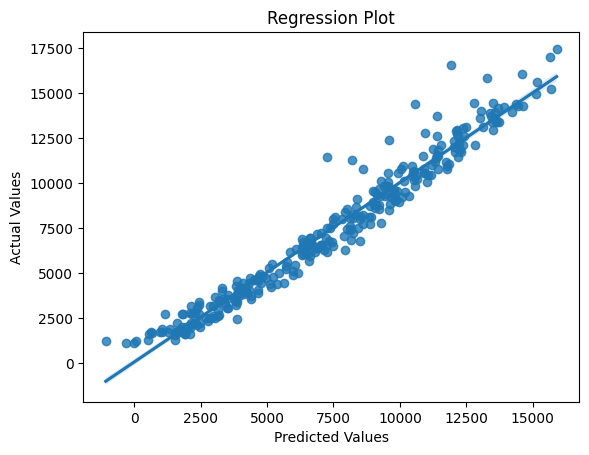

In [49]:
sns.regplot(x=y_pred,y=y_test)
plt.title('Regression Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [50]:
x_train

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
864,55.0,0,33.535,2.0,0,35490.67488,19.0,936721.0,5.354665e+06,1.0,2.408795e+08,1
863,55.0,0,32.775,2.0,0,45491.31676,19.0,943939.0,3.626878e+06,1.0,1.513274e+08,1
399,36.0,0,25.900,1.0,0,18242.64590,14.0,868549.0,5.729113e+05,1.0,1.056821e+08,3
822,58.0,1,28.595,0.0,0,29090.53581,9.0,939139.0,9.484864e+06,1.0,1.523098e+08,1
687,50.0,1,32.300,2.0,0,21549.25960,6.0,921026.0,9.298228e+06,1.0,1.907673e+08,3
...,...,...,...,...,...,...,...,...,...,...,...,...
516,42.0,1,37.180,2.0,0,51466.02322,16.0,881594.0,3.901163e+05,1.0,6.759640e+07,2
191,25.0,0,34.485,0.0,0,24359.15112,2.0,787584.0,6.631139e+06,1.0,2.332156e+07,1
322,33.0,0,26.695,0.0,0,38687.19278,17.0,836450.0,4.915476e+05,1.0,1.183499e+08,1
830,58.0,0,25.200,0.0,0,54364.09398,21.0,937203.0,3.479284e+06,1.0,1.940036e+08,3


In [51]:
# making prediction for a new record
new_records=pd.DataFrame(columns=x_train.columns)

In [52]:
new_records

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region


In [54]:
ls=[27,1,23.5,0,0,46350.61999,6.0,882072.0,2712828.890,0.0,6.494902e+07,2]
new_records.loc[0]=ls

In [55]:
new_records

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
0,27.0,1.0,23.5,0.0,0.0,46350.61999,6.0,882072.0,2712828.89,0.0,64949020.0,2.0


In [56]:
res=model.predict(new_records)

In [57]:
res

array([6652.4681403])